In [1]:
import tsyganenko as tsyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacepy import coordinates as coord
import spacepy.time as spt
from spacepy.time import Ticktock
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import sys
earth_radius_ax = 1.5*6371 #km
#adding the year data here so I don't have to crush my github repo
pathname = '../../data-se3-path-planner/yearData/cuspCrossings2019/'
sys.path.append(pathname)

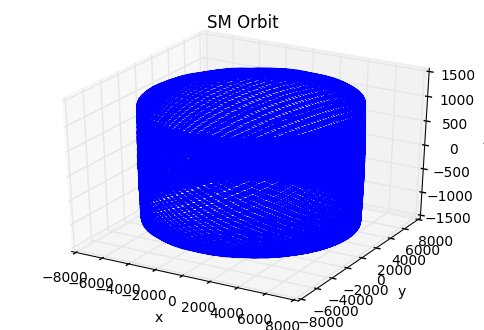

In [2]:
df = pd.read_csv(pathname+'zero_year.csv')
# df = pd.read_csv(pathname+'65_year.csv')
GMAT_MJD_OFFSET = 29999.5
t = df['DefaultSC.A1ModJulian'] + GMAT_MJD_OFFSET
x = df['DefaultSC.gse.X']
y = df['DefaultSC.gse.Y']
z = df['DefaultSC.gse.Z']

spacecraft = coord.Coords([[i,j,k] for i,j,k in zip(x,y,z)], 'GSE', 'car')
spacecraft.ticks = Ticktock(t,'MJD')
spacecraft = spacecraft.convert('SM','car')
points = 10000
# this figure validates what I already expected
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
plt.title('SM Orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# okay i've looked at a couple of orbits from the GSE point of view and
# i now think that it's okay for a zero inclined orbit WRT to the earth
# equator to be inclined WRT to the ecliptic, but like holy moley
# these orbits are confusing sometimes.


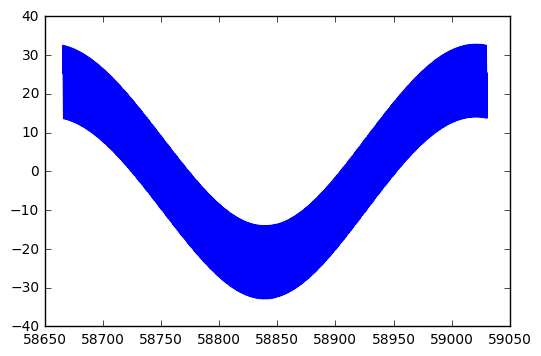

psi is [ 0.44288173  0.44358109  0.44467544 ...,  0.44146736  0.44263966
  0.44267446]
type(phi_c) False
x equals to [ 4000.34180433  4008.74521178  4021.76232335 ...,  3997.47444119
  4011.28765402  4011.69147568]
y equals to [ 0.  0.  0. ...,  0.  0.  0.]
sum of the y vector 0.0
z equals to [ 2177.43734373  2173.74093616  2168.08125175 ...,  2166.27692427
  2160.39142598  2160.22389001]


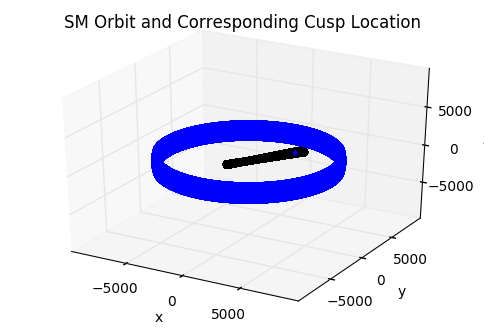

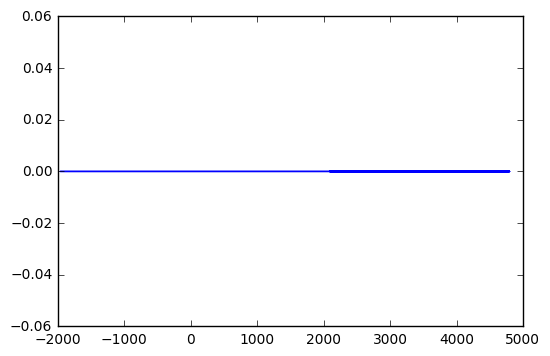

In [3]:
# goal, plot PHI on the same plot
xc,yc,zc = tsyg.orbitalCuspLocation(spacecraft,t)
cusp_location = coord.Coords([[i,j,k] for i,j,k in zip(xc,yc,zc)], 'SM', 'car')
cusp_location.ticks = Ticktock(t,'MJD')
# cusp_location = cusp_location.convert('SM','car')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# if I just want to :points
# ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
# ax.plot(cusp_location.x[:points], cusp_location.y[:points],cusp_location.z[:points])

# if I want EVERYTHING
ax.plot(spacecraft.x,spacecraft.y, spacecraft.z)
ax.scatter(cusp_location.x, cusp_location.y,cusp_location.z)
plt.title('SM Orbit and Corresponding Cusp Location')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-earth_radius_ax, earth_radius_ax)
ax.set_ylim3d(-earth_radius_ax, earth_radius_ax)
ax.set_zlim3d(-earth_radius_ax, earth_radius_ax)
plt.show()
plt.plot(cusp_location.x,cusp_location.y)
plt.show()

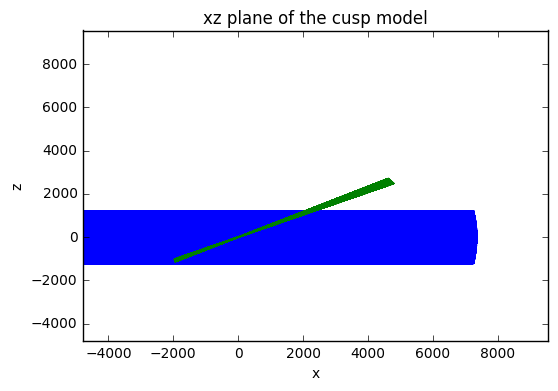

In [4]:
plt.plot(spacecraft.x,spacecraft.z)
plt.plot(cusp_location.x,cusp_location.z)
plt.xlim([-0.5*earth_radius_ax, earth_radius_ax])
plt.ylim([-0.5*earth_radius_ax, earth_radius_ax])
plt.xlabel('x')
plt.ylabel('z')
plt.title('xz plane of the cusp model')
plt.show()



In [5]:
spacecraft_sph = spacecraft.convert('SM','sph')
cusp_location_sph = cusp_location.convert('SM','sph')

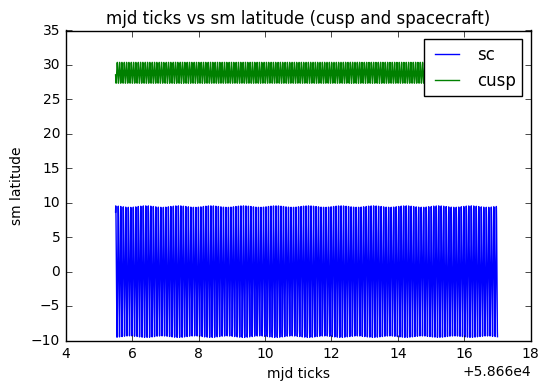

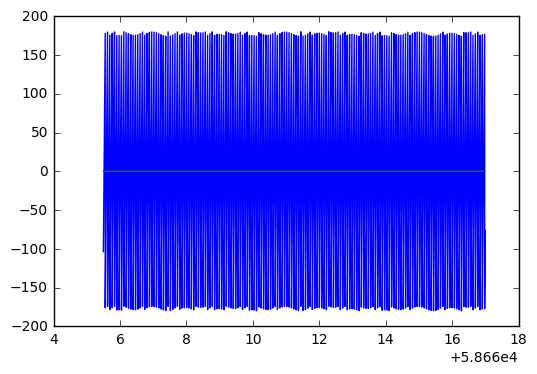

In [6]:
# making the plots
plt.plot(spacecraft_sph.ticks.MJD[:points], spacecraft_sph.lati[:points],label='sc')
plt.plot(cusp_location_sph.ticks.MJD[:points], cusp_location_sph.lati[:points],label='cusp')
plt.legend()
plt.xlabel('mjd ticks')
plt.ylabel('sm latitude')
plt.title('mjd ticks vs sm latitude (cusp and spacecraft)')
plt.show()


plt.plot(spacecraft_sph.ticks.MJD[:points], spacecraft_sph.long[:points],label='sc')
plt.plot(cusp_location_sph.ticks.MJD[:points], cusp_location_sph.long[:points],label='cusp')
plt.show()

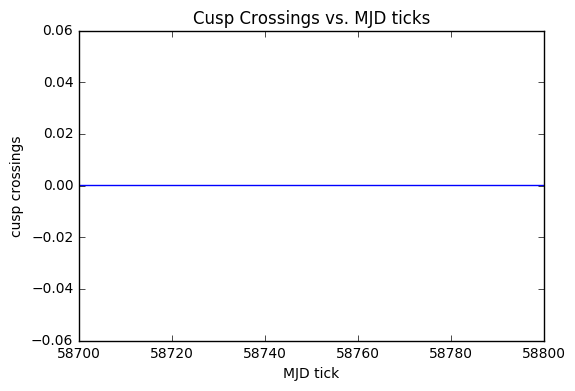

In [7]:
# count it up
count = []
c = 0
for satlat,cusplat, satlon,cusplon in zip(spacecraft_sph.lati, cusp_location_sph.lati, spacecraft_sph.long, cusp_location_sph.long):
    if abs(satlat - cusplat)<=4 and abs(satlon-cusplon)<=1:
        # right now i'm using +/- 2 deg for the latitude,
        # and +/- 0.5 deg for the longitude
        c+=1
        count.append(c)
    else:
        count.append(c)
        
plt.plot(spacecraft_sph.ticks.MJD, count)
plt.xlabel('MJD tick')
plt.ylabel('cusp crossings')
plt.title('Cusp Crossings vs. MJD ticks')
plt.xlim([58700, 58800])
plt.show()

In [ ]:
# what are the min and max cusp locations?